In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
# 한글출력
import matplotlib.font_manager as fm

font_location = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font',family = font_name)

mfile = pd.read_csv('mfile_1.csv', encoding = 'utf-8')
#mfile.head()
dt_A = pd.read_csv('dt_A.csv')
dt_B = pd.read_csv('dt_B.csv')
dt_C = pd.read_csv('dt_C.csv')
dt_D = pd.read_csv('dt_D.csv')

import pandas_profiling as pp

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [2]:
total4 = pd.read_csv('total4.csv')

In [4]:
total4

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,월,요일
0,2018-01-02,220954944,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3829.0,매장A,NaN,10:32,1,화
1,2018-01-02,89023040,정상회원,채소,열매채소,단호박/손질,단호박(깍뚝썰기/300g),1.0,4977.0,매장A,NaN,10:41,1,화
2,2018-01-02,354941440,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083.0,매장A,NaN,11:00,1,화
3,2018-01-02,786634048,탈퇴,반찬,어묵/묵,묵,도토리묵(420g:1모),1.0,7083.0,매장A,NaN,11:28,1,화
4,2018-01-02,438543104,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083.0,매장A,NaN,11:59,1,화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292019,2018-10-31,560448896,정상회원,주곡,멥쌀,멥쌀,백미/유(2kg),1.0,15315.0,매장D,NaN,13:16,10,수
292020,2018-10-31,68976384,정상회원,채소,잎/줄기채소,시금치,시금치(300g),2.0,6892.0,매장D,NaN,11:08,10,수
292021,2018-10-31,1519813440,정상회원,반찬,밑반찬,김가공,구운자른김(15g*3봉),1.0,7466.0,매장D,NaN,14:27,10,수
292022,2018-10-31,654809792,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3733.0,매장D,NaN,16:02,10,수


In [6]:
total4['금토일'] = np.where(total4['요일'].isin(['금','토','일']), 1, 0)
total4['토일'] = np.where(total4['요일'].isin(['토','일']), 1, 0)
total4

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,월,요일,금토일,토일
0,2018-01-02,220954944,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3829.0,매장A,NaN,10:32,1,화,0,0
1,2018-01-02,89023040,정상회원,채소,열매채소,단호박/손질,단호박(깍뚝썰기/300g),1.0,4977.0,매장A,NaN,10:41,1,화,0,0
2,2018-01-02,354941440,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083.0,매장A,NaN,11:00,1,화,0,0
3,2018-01-02,786634048,탈퇴,반찬,어묵/묵,묵,도토리묵(420g:1모),1.0,7083.0,매장A,NaN,11:28,1,화,0,0
4,2018-01-02,438543104,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083.0,매장A,NaN,11:59,1,화,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292019,2018-10-31,560448896,정상회원,주곡,멥쌀,멥쌀,백미/유(2kg),1.0,15315.0,매장D,NaN,13:16,10,수,0,0
292020,2018-10-31,68976384,정상회원,채소,잎/줄기채소,시금치,시금치(300g),2.0,6892.0,매장D,NaN,11:08,10,수,0,0
292021,2018-10-31,1519813440,정상회원,반찬,밑반찬,김가공,구운자른김(15g*3봉),1.0,7466.0,매장D,NaN,14:27,10,수,0,0
292022,2018-10-31,654809792,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3733.0,매장D,NaN,16:02,10,수,0,0


In [10]:
stranger = total4[total4['회원번호'] == 1670400000]
stranger.groupby('물품명')['물품명'].count().sort_values(ascending = False).head(50)

물품명
두부(1모:420g)              35
콩나물(300g)                24
찌개용두부(420g)              20
당근(500g)                 12
검은콩두유(160ml*5봉)          12
유정란/매장용(15알/국내산)         11
단호박품은쌀과자(40g)            10
유기농우유(종이팩/900ml)         10
차례상약과(350g/10개)           9
구운도시락김(5g*3봉)             9
동물복지유정란(15알/국내산)          8
상큼한감귤&채소(125ml*3개)        7
두부(반모:270g)               7
유정란/매장용(안심대안사료/15알)       7
팽이버섯(150g)                7
동그랑쌀과자(70g)               7
현미유(500ml)                6
상큼한포도(120ml)              6
콩국물(300g)                 6
청경채(200g)                 6
플레인요구르트(범산/450ml)         6
주먹밥채소&해물(36g)             6
도토리묵(420g:1모)             6
상추(200g)                  6
유기보리차(500g)               6
블루베리요구르트(120ml)           6
검은콩낫토(50g*2)              6
동물복지유정란/중란(10알/국내산)       5
우유(범산/200ml)              5
7곡딸기롤과자(100g/10개입)        5
카스텔라(소:100g)/매장           5
두부연어묵(270g)               5
아이스바딸기(75ml)              5
딸기(1kg)                   5
딸기/(500g)                 5
채소품은쌀과자(40g)    

In [28]:
item = stranger[['물품명','구매수량','구매금액']]
item['물품가격'] = item['구매금액'] / item['구매수량'] 
cost = item.groupby('물품명')['구매수량'].sum()
cost_df = pd.DataFrame(cost)
cost_df.reset_index(inplace = True)
cost_merge = cost_df.merge(item[['물품명','물품가격']], on = '물품명', how = 'left')
cost_merge.sort_values('물품가격', ascending = False).drop_duplicates().head(50)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,물품명,구매수량,물품가격
1203,특대3호,1.0,357995.000000
1321,흑염소진액(100ml*30봉),1.0,166554.000000
171,꽃사슴녹용액(여성/30봉*90ml),1.0,126351.000000
1306,홍삼액(6년근/30봉),1.0,118694.000000
263,도라지청(210g),1.0,70833.000000
1229,포도즙(팩:120ml*20봉),0.2,65280.000000
1230,포도즙(팩:120ml*20봉),0.2,59350.000000
1305,홍두깨-성남용인,1.0,59270.000000
506,백미/유(8kg)-매장용,1.0,58773.000000
499,배즙(1상자:120ml*30봉),0.1,58390.000000


# 군집분석

In [30]:
mfile_model = pd.read_csv('mfile_model.csv')
cluster_data = mfile_model.drop(['연령대','회원번호','연령60이상','연령대_4560대','동'], inplace = False, axis = 1)
cluster_data = pd.get_dummies(cluster_data)
cluster_data

,조합원상태,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,구매금액,방문횟수,구_광주,구_기타,...,구_수원 권선구,구_수원 영통구,구_수원 장안구,구_수원 팔달구,구_수정구,구_수지구,구_중원구,구_처인구,구_하남,구_화성
0,1,0,58.0,0,0,0,7658.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,34.0,0,0,0,36948.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,38.0,0,0,0,142831.0,15,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,73.0,0,0,0,138892.0,4,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,42.0,1,0,0,632554.0,28,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11537,0,0,47.0,0,0,0,39246.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
11538,1,0,43.0,0,0,0,43457.0,2,0,0,...,0,0,0,0,0,1,0,0,0,0
11539,1,0,67.0,0,0,0,152960.0,9,0,0,...,0,0,0,0,0,1,0,0,0,0
11540,1,0,44.0,1,0,0,641334.0,21,0,0,...,0,0,0,0,0,1,0,0,0,0


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np
import pandas_profiling as pp

# 한글출력
import matplotlib.font_manager as fm

font_location = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font',family = font_name)

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import GridSearchCV

import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import statsmodels.formula.api as smf

import pandas_profiling as pp

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN

In [33]:
df_raw = cluster_data
# 데이터 표준화
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(df_raw)
df_raw_scaled[:5]

array([[ 0.11120853, -0.24765567,  0.7172254 , -0.31518692, -0.29081019,
        -0.13447076, -0.52874246, -0.62068453, -0.07978085, -0.3312114 ,
        -0.2533202 , -0.24804951, -0.12335647, -0.09109949, -0.03952161,
        -0.13809838, -0.05104876, -0.04468446, -0.04564751,  0.63921174,
        -0.04564751, -0.08032894, -0.03484874, -0.0824858 ],
       [ 0.11120853, -0.24765567, -1.3582089 , -0.31518692, -0.29081019,
        -0.13447076, -0.47283745, -0.62068453, -0.07978085, -0.3312114 ,
        -0.2533202 , -0.24804951, -0.12335647, -0.09109949, -0.03952161,
        -0.13809838, -0.05104876, -0.04468446, -0.04564751, -1.56442683,
        -0.04564751, 12.44881412, -0.03484874, -0.0824858 ],
       [ 0.11120853, -0.24765567, -1.01230318, -0.31518692, -0.29081019,
        -0.13447076, -0.2707415 ,  0.11977447, 12.5343364 , -0.3312114 ,
        -0.2533202 , -0.24804951, -0.12335647, -0.09109949, -0.03952161,
        -0.13809838, -0.05104876, -0.04468446, -0.04564751, -1.56442683,
  

In [36]:
df_raw

,조합원상태,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,구매금액,방문횟수,구_광주,구_기타,...,구_수원 권선구,구_수원 영통구,구_수원 장안구,구_수원 팔달구,구_수정구,구_수지구,구_중원구,구_처인구,구_하남,구_화성
0,1,0,58.0,0,0,0,7658.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,34.0,0,0,0,36948.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,38.0,0,0,0,142831.0,15,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,73.0,0,0,0,138892.0,4,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,42.0,1,0,0,632554.0,28,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11537,0,0,47.0,0,0,0,39246.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
11538,1,0,43.0,0,0,0,43457.0,2,0,0,...,0,0,0,0,0,1,0,0,0,0
11539,1,0,67.0,0,0,0,152960.0,9,0,0,...,0,0,0,0,0,1,0,0,0,0
11540,1,0,44.0,1,0,0,641334.0,21,0,0,...,0,0,0,0,0,1,0,0,0,0


In [43]:
cost = df_raw['구매금액']
df_raw.drop('구매금액', inplace = True, axis = 1)
df_raw['구매금액'] = cost
df_raw

,조합원상태,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,방문횟수,구_광주,구_기타,구_기흥구,...,구_수원 영통구,구_수원 장안구,구_수원 팔달구,구_수정구,구_수지구,구_중원구,구_처인구,구_하남,구_화성,구매금액
0,1,0,58.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,7658.0
1,1,0,34.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,36948.0
2,1,0,38.0,0,0,0,15,1,0,0,...,0,0,0,0,0,0,0,0,0,142831.0
3,1,0,73.0,0,0,0,4,0,0,0,...,0,0,0,0,1,0,0,0,0,138892.0
4,1,0,42.0,1,0,0,28,0,0,0,...,0,0,0,0,1,0,0,0,0,632554.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11537,0,0,47.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,39246.0
11538,1,0,43.0,0,0,0,2,0,0,0,...,0,0,0,0,1,0,0,0,0,43457.0
11539,1,0,67.0,0,0,0,9,0,0,0,...,0,0,0,0,1,0,0,0,0,152960.0
11540,1,0,44.0,1,0,0,21,0,0,0,...,0,0,0,0,1,0,0,0,0,641334.0


In [44]:
# 데이터 표준화
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(df_raw)
#df_raw_scaled[:5]

In [39]:
df_raw_scaled

array([[ 0.11120853, -0.24765567,  0.7172254 , ..., -0.08032894,
        -0.03484874, -0.0824858 ],
       [ 0.11120853, -0.24765567, -1.3582089 , ..., 12.44881412,
        -0.03484874, -0.0824858 ],
       [ 0.11120853, -0.24765567, -1.01230318, ..., -0.08032894,
        -0.03484874, -0.0824858 ],
       ...,
       [ 0.11120853, -0.24765567,  1.49551327, ..., -0.08032894,
        -0.03484874, -0.0824858 ],
       [ 0.11120853, -0.24765567, -0.49344461, ..., -0.08032894,
        -0.03484874, -0.0824858 ],
       [ 0.11120853, -0.24765567,  1.40903684, ..., -0.08032894,
        -0.03484874, -0.0824858 ]])

In [45]:
# 목표 변수
df_raw_y = df_raw_scaled[:,-1]
# 설명 변수
df_raw_x = df_raw_scaled[:,:23]

In [48]:
df_raw_y.shape

(11542,)

Text(0, 0.5, 'sample index')

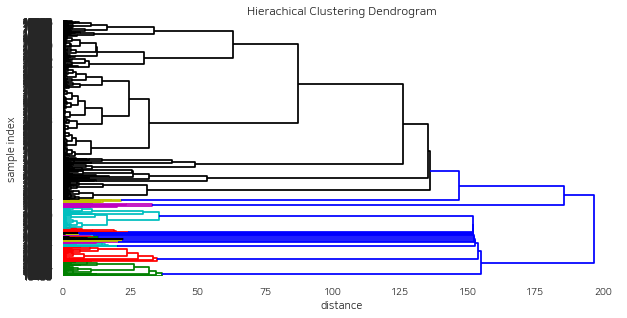

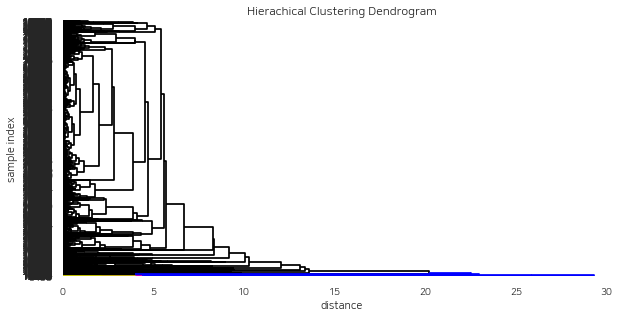

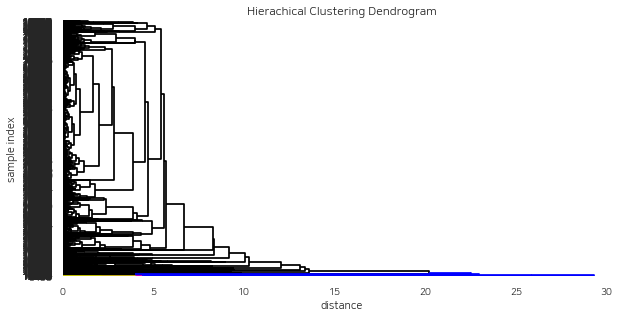

In [49]:
# 연결 : ward, 거리계산 : Euclidean
Z_ward = linkage(df_raw_x, method = "ward", metric = "euclidean")

# 연결 : average, 거리계산 : Euclidean
Z_average = linkage(df_raw_x, method = "average", metric = "euclidean")

# 연결 : average, 거리계산 : minkowski
Z_Minkowski = linkage(df_raw_x, method = "average", metric = "minkowski")

# 덴드로그램[연결 : ward, 거리계산 : Euclidean]
plt.figure(figsize = (10,16))
ax = plt.subplot(311)

# Dataframe 변경 : Z_ward, Z_average, Z_Minkowski
dendrogram(Z_ward, leaf_font_size = 10, orientation = "right")
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

plt.figure(figsize = (10,16))
ax2 = plt.subplot(312)

# Dataframe 변경 : Z_ward, Z_average, Z_Minkowski
dendrogram(Z_average, leaf_font_size = 10, orientation = "right")
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

plt.figure(figsize = (10,16))
ax3 = plt.subplot(313)

# Dataframe 변경 : Z_ward, Z_average, Z_Minkowski
dendrogram(Z_Minkowski, leaf_font_size = 10, orientation = "right")
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

In [50]:
# linkage 함수를 통해 얻은 Z_ward 행렬 데이터를 이용하여 군집 생성
cluster_hierarchical = fcluster(Z = Z_ward, t = 5, criterion = "distance")
# 데이터에 계층형 군집 결과 입력
df_raw['ClusterHierarchical'] = cluster_hierarchical
df_raw.head()

,조합원상태,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,방문횟수,구_광주,구_기타,구_기흥구,...,구_수원 장안구,구_수원 팔달구,구_수정구,구_수지구,구_중원구,구_처인구,구_하남,구_화성,구매금액,ClusterHierarchical
0,1,0,58.0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,7658.0,183
1,1,0,34.0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,36948.0,61
2,1,0,38.0,0,0,0,15,1,0,0,...,0,0,0,0,0,0,0,0,142831.0,41
3,1,0,73.0,0,0,0,4,0,0,0,...,0,0,0,1,0,0,0,0,138892.0,179
4,1,0,42.0,1,0,0,28,0,0,0,...,0,0,0,1,0,0,0,0,632554.0,132


In [51]:
# 집계 함수를 이용한 군집별 데이터 요약
ds_summary_hc = df_raw.groupby("ClusterHierarchical").agg(['min','mean','max'])
# 집계 함수를 이용할 경우 열 이름이 두 줄에 걸쳐 나오므로 한 줄로 변환
level0 = ds_summary_hc.columns.get_level_values(0)
level1 = ds_summary_hc.columns.get_level_values(1)
ds_summary_hc.columns = level0 + "_" + level1
ds_summary_hc.reset_index(inplace = True)
ds_summary_hc.round(3)

,ClusterHierarchical,조합원상태_min,조합원상태_mean,조합원상태_max,성별_min,성별_mean,성별_max,연령_min,연령_mean,연령_max,...,구_처인구_max,구_하남_min,구_하남_mean,구_하남_max,구_화성_min,구_화성_mean,구_화성_max,구매금액_min,구매금액_mean,구매금액_max
0,1,1,1,1,1,1.0,1,41.0,44.000,48.0,...,0,0,0,0,0,0,0,690649.0,844960.250,1077450.0
1,2,1,1,1,1,1.0,1,35.0,50.333,80.0,...,0,0,0,0,0,0,0,3637.0,8614.667,15315.0
2,3,1,1,1,1,1.0,1,25.0,38.471,46.0,...,0,0,0,0,0,0,0,766.0,181248.294,1241208.0
3,4,1,1,1,1,1.0,1,48.0,56.467,72.0,...,0,0,0,0,0,0,0,1914.0,100333.133,339999.0
4,5,1,1,1,0,0.0,0,64.0,71.333,80.0,...,0,0,0,0,0,0,0,145975.0,478778.000,803378.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,1,1,1,0,0.0,0,44.0,50.040,56.0,...,0,0,0,0,0,0,0,414472.0,1302557.300,5248304.0
189,190,1,1,1,0,0.0,0,54.0,59.181,65.0,...,0,0,0,0,0,0,0,261031.0,1010715.193,4846438.0
190,191,1,1,1,0,0.0,0,40.0,46.751,54.0,...,0,0,0,0,0,0,0,200346.0,627524.249,3100026.0
191,192,1,1,1,0,0.0,0,34.0,39.735,43.0,...,0,0,0,0,0,0,0,526075.0,1211925.612,2198764.0


In [60]:
tmp = ds_summary_hc.sort_values(['구매금액_mean'], ascending = False)
tmp[tmp.연령_min != tmp.연령_max][:60]

,ClusterHierarchical,조합원상태_min,조합원상태_mean,조합원상태_max,성별_min,성별_mean,성별_max,연령_min,연령_mean,연령_max,...,구_처인구_max,구_하남_min,구_하남_mean,구_하남_max,구_화성_min,구_화성_mean,구_화성_max,구매금액_min,구매금액_mean,구매금액_max
108,109,1,1,1,0,0.0,0,41.0,50.400000,59.0,...,0,0,0,0,0,0,0,2275010.0,4.633756e+06,9770784.0
113,114,1,1,1,0,0.0,0,32.0,47.250000,55.0,...,0,0,0,0,0,0,0,1123184.0,3.016361e+06,5752051.0
99,100,1,1,1,1,1.0,1,59.0,67.833333,78.0,...,0,0,0,0,0,0,0,1355559.0,2.790088e+06,5192920.0
102,103,1,1,1,0,0.0,0,59.0,65.105263,80.0,...,0,0,0,0,0,0,0,1228368.0,2.785173e+06,6692889.0
112,113,1,1,1,0,0.0,0,55.0,65.125000,79.0,...,0,0,0,0,0,0,0,1271070.0,2.510653e+06,4705219.0
100,101,1,1,1,1,1.0,1,35.0,42.250000,50.0,...,0,0,0,0,0,0,0,1192872.0,2.131540e+06,3363572.0
107,108,1,1,1,0,0.0,0,38.0,49.333333,58.0,...,0,0,0,0,0,0,0,596049.0,1.994887e+06,5137458.0
111,112,1,1,1,0,0.0,0,42.0,45.666667,52.0,...,0,0,0,0,0,0,0,1511199.0,1.931581e+06,2450202.0
187,188,1,1,1,0,0.0,0,58.0,63.750000,78.0,...,0,0,0,0,0,0,0,816973.0,1.897491e+06,4522092.0
105,106,1,1,1,0,0.0,0,32.0,42.333333,58.0,...,0,0,0,0,0,0,0,1549461.0,1.840959e+06,2325602.0


In [52]:
# 최대 군집 생성 개수
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    # 각 데이터로부터 가장 가까운 군집 중심점까지 거리 제곱합
    clus_error.append(clus.inertia_)
ds_error = pd.DataFrame({'NumberofCluster' : cluster_range,
                        'Error' : clus_error})
ds_error

,NumberofCluster,Error
0,1,265466.000000
1,2,244416.059556
2,3,233707.590745
3,4,218933.617954
4,5,208004.858270
5,6,194143.638387
6,7,182852.414910
7,8,168961.415947
8,9,156731.749875
9,10,145274.594058


Text(0, 0.5, 'Sum of squared distance')

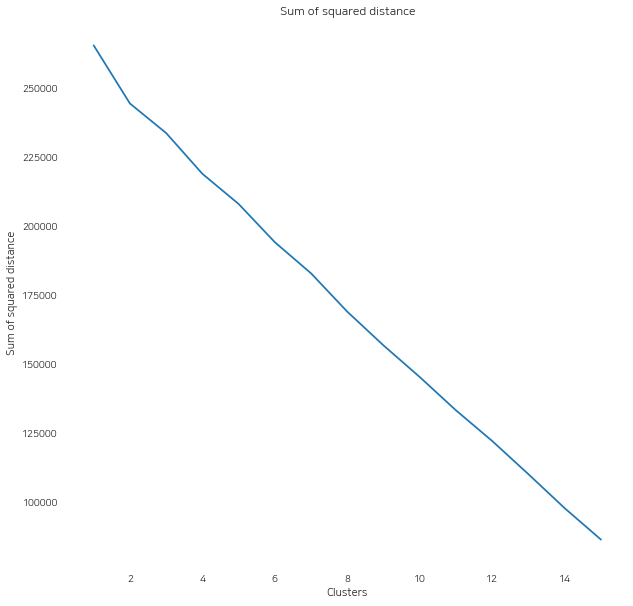

In [53]:
plt.figure(figsize = (10,10))
plt.plot(ds_error['NumberofCluster'], ds_error['Error'])
plt.title("Sum of squared distance")
plt.xlabel('Clusters')
plt.ylabel('Sum of squared distance')

In [54]:
clus = KMeans(5)
clus.fit(df_raw_x)
cluster_kmeans = [i+1 for i in clus.labels_]
df_raw['ClusterKmeans'] = cluster_kmeans
df_raw.head()

,조합원상태,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,방문횟수,구_광주,구_기타,구_기흥구,...,구_수원 팔달구,구_수정구,구_수지구,구_중원구,구_처인구,구_하남,구_화성,구매금액,ClusterHierarchical,ClusterKmeans
0,1,0,58.0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,7658.0,183,5
1,1,0,34.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,36948.0,61,1
2,1,0,38.0,0,0,0,15,1,0,0,...,0,0,0,0,0,0,0,142831.0,41,1
3,1,0,73.0,0,0,0,4,0,0,0,...,0,0,1,0,0,0,0,138892.0,179,5
4,1,0,42.0,1,0,0,28,0,0,0,...,0,0,1,0,0,0,0,632554.0,132,5


In [55]:
ds_summary_km = df_raw.drop('ClusterHierarchical',
                           axis = 1,
                           inplace = False).groupby('ClusterKmeans').agg(['min','mean','max'])
level0 = ds_summary_km.columns.get_level_values(0)
level1 = ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns = level0 + "_" + level1
ds_summary_km.reset_index(inplace = True)
ds_summary_km.round(3)

,ClusterKmeans,조합원상태_min,조합원상태_mean,조합원상태_max,성별_min,성별_mean,성별_max,연령_min,연령_mean,연령_max,...,구_처인구_max,구_하남_min,구_하남_mean,구_하남_max,구_화성_min,구_화성_mean,구_화성_max,구매금액_min,구매금액_mean,구매금액_max
0,1,0,0.987,1,0,0.066,1,25.0,48.520,87.0,...,1,0,0.009,1,0,0.051,1,0.0,140966.355,2708512.0
1,2,0,0.994,1,0,0.053,1,27.0,49.811,108.0,...,0,0,0.000,0,0,0.000,0,0.0,147034.998,2081026.0
2,3,1,1.000,1,0,0.054,1,32.0,52.790,92.0,...,0,0,0.000,0,0,0.000,0,443091.0,2415358.551,9770784.0
3,4,0,0.986,1,0,0.096,1,26.0,49.326,107.0,...,0,0,0.000,0,0,0.000,0,0.0,97615.763,2222822.0
4,5,0,0.987,1,0,0.051,1,17.0,49.900,91.0,...,0,0,0.000,0,0,0.000,0,0.0,295690.277,5662929.0


In [56]:
ds_summary_km

,ClusterKmeans,조합원상태_min,조합원상태_mean,조합원상태_max,성별_min,성별_mean,성별_max,연령_min,연령_mean,연령_max,...,구_처인구_max,구_하남_min,구_하남_mean,구_하남_max,구_화성_min,구_화성_mean,구_화성_max,구매금액_min,구매금액_mean,구매금액_max
0,1,0,0.986979,1,0,0.065755,1,25.0,48.519531,87.0,...,1,0,0.009115,1,0,0.050781,1,0.0,1.409664e+05,2708512.0
1,2,0,0.993967,1,0,0.052790,1,27.0,49.811463,108.0,...,0,0,0.000000,0,0,0.000000,0,0.0,1.470350e+05,2081026.0
2,3,1,1.000000,1,0,0.053659,1,32.0,52.790244,92.0,...,0,0,0.000000,0,0,0.000000,0,443091.0,2.415359e+06,9770784.0
3,4,0,0.985940,1,0,0.095782,1,26.0,49.326011,107.0,...,0,0,0.000000,0,0,0.000000,0,0.0,9.761576e+04,2222822.0
4,5,0,0.987375,1,0,0.051375,1,17.0,49.900250,91.0,...,0,0,0.000000,0,0,0.000000,0,0.0,2.956903e+05,5662929.0


# 바뀐 데이터(total4)로 랜덤포레스트 빈도

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [63]:
mfile_model = pd.read_csv('mfile_model.csv')

In [64]:
mfile_model

,회원번호,조합원상태,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구매금액,구,동,연령60이상,방문횟수,연령대_4560대
0,1000012800,1,0,58.0,0,0,0,50대,7658.0,수지구,풍덕천동,0,1,1
1,1000103744,1,0,34.0,0,0,0,30대,36948.0,처인구,고림동,0,1,0
2,1000122304,1,0,38.0,0,0,0,30대,142831.0,광주,기타,0,15,0
3,1000163136,1,0,73.0,0,0,0,70대이상,138892.0,수지구,동천동,1,4,0
4,1000281920,1,0,42.0,1,0,0,40대,632554.0,수지구,풍덕천동,0,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11537,999682432,0,0,47.0,0,0,0,40대,39246.0,수지구,동천동,0,1,1
11538,999721408,1,0,43.0,0,0,0,40대,43457.0,수지구,동천동,0,2,1
11539,999738112,1,0,67.0,0,0,0,60대,152960.0,수지구,성복동,1,9,1
11540,999754816,1,0,44.0,1,0,0,40대,641334.0,수지구,상현동,0,21,1


In [66]:
mfile_ranfo = mfile_model.drop(['연령대','연령60이상','연령대_4560대','구','회원번호'], axis = 1, inplace = False)

In [70]:
mfile_model_rf = pd.get_dummies(mfile_ranfo)
mfile_model_rf

,조합원상태,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,구매금액,방문횟수,동_고림동,동_공세동,...,동_정자동,동_죽전동,동_중동,동_중앙동,동_지곡동,동_청덕동,동_태평동,동_판교동,동_풍덕천동,동_하대원동
0,1,0,58.0,0,0,0,7658.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,34.0,0,0,0,36948.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,38.0,0,0,0,142831.0,15,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,73.0,0,0,0,138892.0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,42.0,1,0,0,632554.0,28,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11537,0,0,47.0,0,0,0,39246.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11538,1,0,43.0,0,0,0,43457.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
11539,1,0,67.0,0,0,0,152960.0,9,0,0,...,0,0,0,0,0,0,0,0,0,0
11540,1,0,44.0,1,0,0,641334.0,21,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
# 종속변수를 가진 데이터셋과 독립변수들을 갖는 데이터셋 생성
df_raw_y = mfile_model_rf['방문횟수']
df_raw_x = mfile_model_rf.drop('방문횟수', axis = 1, inplace = False)

In [72]:
# train, test, validation 데이터셋 shape 확인
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
df_train_x, df_valid_x, df_train_y, df_valid_y = train_test_split(df_train_x, d48	0.902	0.915
16	51	0.899	0.915
17	54	0.881	0.915
18	57	0.866	0.915
19	60	0.855	0.915f_train_y, test_size = 3/7, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))
print("valid data X size : {}".format(df_valid_x.shape))
print("valid data Y size : {}".format(df_valid_y.shape))

train data X size : (4616, 68)
train data Y size : (4616,)
test data X size : (3463, 68)
test data Y size : (3463,)
valid data X size : (3463, 68)
valid data Y size : (3463,)


In [73]:
# sklearn의 필요한 라이브러리 불러오기
from sklearn.ensemble import RandomForestRegressor

rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))
# Validation 데이터 설명력
print("Score on valid set : {:.3f}".format(rf_uncustomized.score(df_valid_x, df_valid_y)))

Score on training set : 0.983
Score on test set : 0.900
Score on valid set : 0.908


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [74]:
# Train 및 Valid 설명력 저장
train_score = []; valid_score = []48	0.902	0.915
16	51	0.899	0.915
17	54	0.881	0.915
18	57	0.866	0.915
19	60	0.855	0.915
# n_estimator : 트리 수 변경 ( 3 ~ 60 )
para_n_tree = [n_tree * 5 for n_tree in range(1,21)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    valid_score.append(rf.score(df_valid_x, df_valid_y))
# 결과저장
df_score_n = pd.DataFrame()
df_score_n['n_estimator'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['ValidScore'] = valid_score

# 모델 설명력 확인
df_score_n.round(3)

,n_estimator,TrainScore,ValidScore
0,5,0.979,0.902
1,10,0.983,0.908
2,15,0.985,0.910
3,20,0.986,0.912
4,25,0.986,0.914
5,30,0.986,0.914
6,35,0.986,0.915
7,40,0.987,0.915
8,45,0.987,0.915
9,50,0.987,0.915


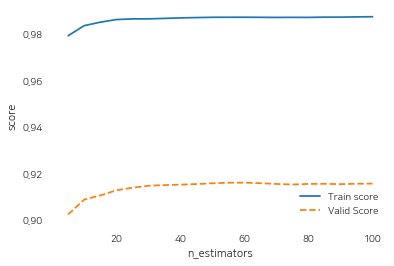

In [75]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train score")
plt.plot(para_n_tree, valid_score, linestyle = "--", label = "Valid Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [76]:
# n_estimator = 60
# train 및 valid 설명력 결과 저장
train_score = []; test_score = [];
# min_samples_leaf : 잎사귀 최소 자료 수
para_leaf = [n_leaf * 3 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state = 1234,
                              n_estimators = 60,
                              min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_valid_x, df_valid_y))

df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['ValidScore'] = valid_score

# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,ValidScore
0,3,0.962,0.902
1,6,0.943,0.908
2,9,0.934,0.910
3,12,0.929,0.912
4,15,0.925,0.914
5,18,0.922,0.914
6,21,0.920,0.915
7,24,0.917,0.915
8,27,0.906,0.915
9,30,0.901,0.915


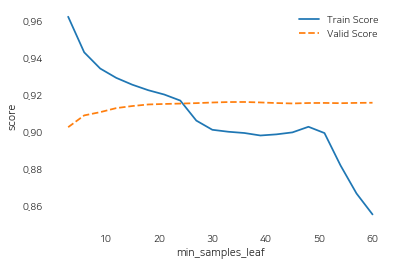

In [77]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label  = "Train Score")
plt.plot(para_leaf, valid_score, linestyle = "--", label  = "Valid Score")
plt.ylabel("score"); plt.xlabel("min_samples_leaf")
plt.legend()

In [92]:
# train 및 test 데이터 설명력 저장
train_score = []; valid_score = [];
# min_samples_split : 분할하기 위한 노드의 최소 자료 수
para_split = [n_split * 2 for n_split in range(20,40)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state = 1234,
                              n_estimators = 60,
                              min_samples_leaf = 21,
                              min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    valid_score.append(rf.score(df_valid_x, df_valid_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['ValidScore'] = valid_score

# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,ValidScore
0,40,0.920,0.914
1,42,0.920,0.914
2,44,0.920,0.913
3,46,0.919,0.913
4,48,0.918,0.911
5,50,0.915,0.908
6,52,0.911,0.904
7,54,0.907,0.900
8,56,0.905,0.898
9,58,0.903,0.896


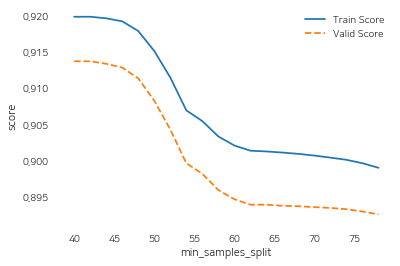

In [93]:
plt.plot(para_split, train_score, linestyle = "-", label  = "Train Score")
plt.plot(para_split, valid_score, linestyle = "--", label  = "Valid Score")
plt.ylabel("score"); plt.xlabel("min_samples_split")
plt.legend()

In [94]:
# train 및 test 데이터 설명력 저장
train_score = []; valid_score = [];
# para_depth : 최대 깊이 변경
para_depth = [n_depth for n_depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state = 1234,
                              n_estimators = 60,
                              min_samples_leaf = 21,
                              min_samples_split = 42,
                              max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    valid_score.append(rf.score(df_valid_x, df_valid_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplesSplit'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['ValidScore'] = valid_score

# 모델 설명력 확인
df_score_depth.round(3)

,MinSamplesSplit,TrainScore,ValidScore
0,1,0.577,0.588
1,2,0.816,0.810
2,3,0.891,0.890
3,4,0.907,0.904
4,5,0.915,0.911
5,6,0.918,0.913
6,7,0.919,0.914
7,8,0.920,0.914
8,9,0.920,0.914
9,10,0.920,0.914


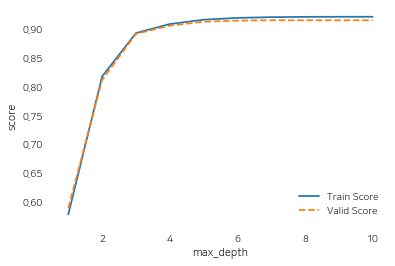

In [95]:
plt.plot(para_depth, train_score, linestyle = "-", label  = "Train Score")
plt.plot(para_depth, valid_score, linestyle = "--", label  = "Valid Score")
plt.ylabel("score"); plt.xlabel("max_depth")
plt.legend()

In [102]:
# 랜덤포레스트 빈도수 최종모델
# 최종모델 생성
rf_final = RandomForestRegressor(random_state = 1234,
                                n_estimators = 60,
                                min_samples_leaf = 21,
                                min_samples_split = 42,
                                max_depth = 7)
rf_final.fit(df_train_x, df_train_y)
print("랜덤포레스트 방문빈도 mfile_model로 돌린 결과")
print("score on training set : {}".format(rf_final.score(df_train_x, df_train_y)))
print("score on validation set : {}".format(rf_final.score(df_valid_x, df_valid_y)))

# Test dataset 
print("score on test set : {}".format(rf_final.score(df_test_x, df_test_y)))

랜덤포레스트 방문빈도 mfile_model로 돌린 결과
score on training set : 0.9190892233368008
score on validation set : 0.9137257000818373
score on test set : 0.9171332794232291


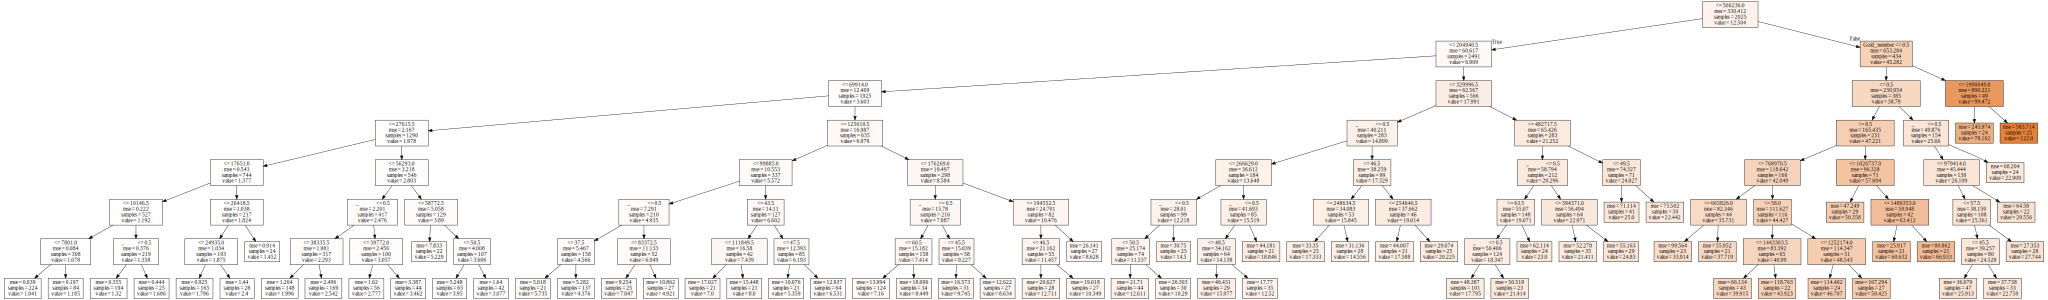

In [99]:
# 다수의 의사결정나무 중 첫번째(0번째)를 출력
v_feature_name = df_train_x.columns
export_graphviz(rf_final.estimators_[0], out_file = "rfr_final_0.dot",
               feature_names = v_feature_name, impurity = True, filled = True)
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

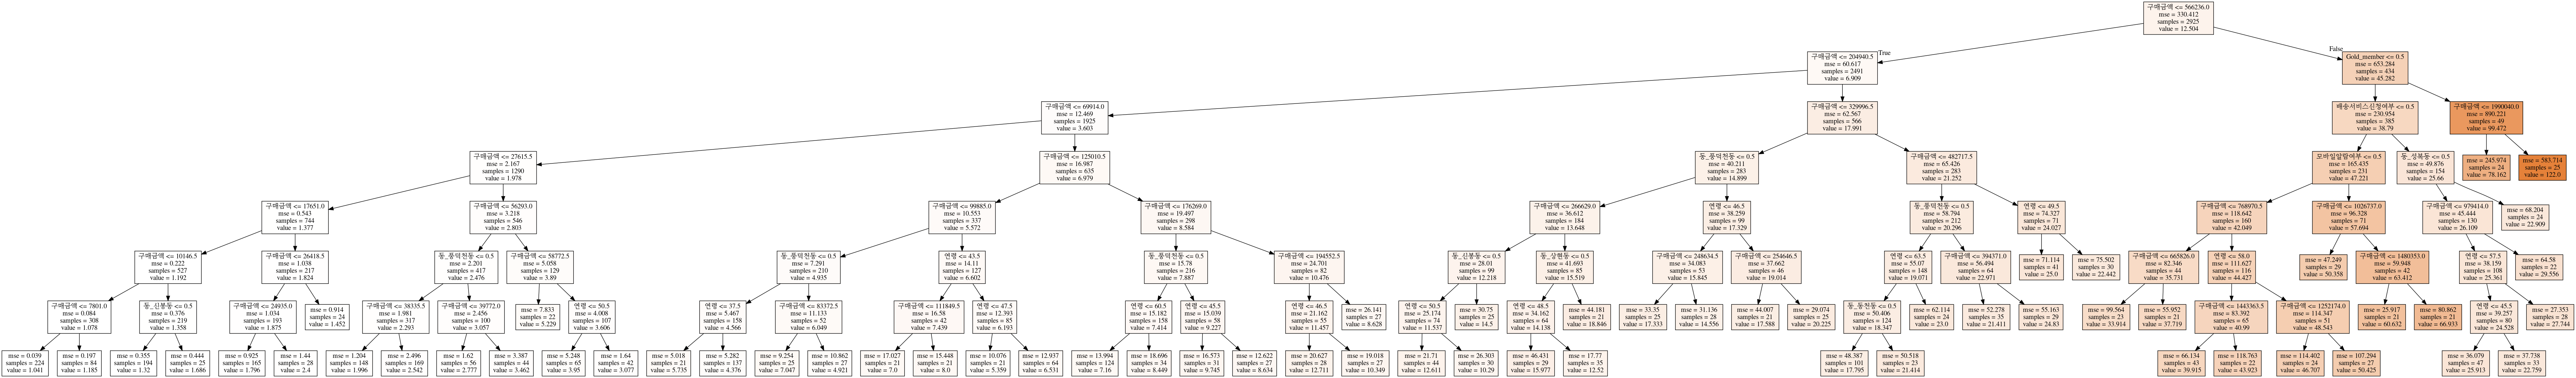

In [100]:
from IPython.display import Image
import pydotplus
dt_graph = pydotplus.graph_from_dot_data(dot_graph)
Image(dt_graph.create_png())

Text(0, 0.5, '변수')

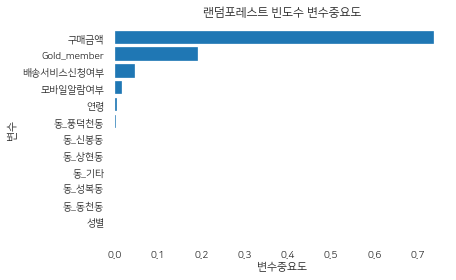

In [101]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending = True, inplace = True)
df_importance.round(3)
#df_importance.sort_values('Importance', ascending = True, inplace = True)
df_importance = df_importance[df_importance['Importance'] != 0]
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.title("랜덤포레스트 빈도수 변수중요도")
plt.xlabel("변수중요도")
plt.ylabel("변수")

# 회원별 선호제품 뽑기

In [106]:
total4

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,월,요일,금토일,토일
0,2018-01-02,220954944,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3829.0,매장A,NaN,10:32,1,화,0,0
1,2018-01-02,89023040,정상회원,채소,열매채소,단호박/손질,단호박(깍뚝썰기/300g),1.0,4977.0,매장A,NaN,10:41,1,화,0,0
2,2018-01-02,354941440,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083.0,매장A,NaN,11:00,1,화,0,0
3,2018-01-02,786634048,탈퇴,반찬,어묵/묵,묵,도토리묵(420g:1모),1.0,7083.0,매장A,NaN,11:28,1,화,0,0
4,2018-01-02,438543104,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083.0,매장A,NaN,11:59,1,화,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292019,2018-10-31,560448896,정상회원,주곡,멥쌀,멥쌀,백미/유(2kg),1.0,15315.0,매장D,NaN,13:16,10,수,0,0
292020,2018-10-31,68976384,정상회원,채소,잎/줄기채소,시금치,시금치(300g),2.0,6892.0,매장D,NaN,11:08,10,수,0,0
292021,2018-10-31,1519813440,정상회원,반찬,밑반찬,김가공,구운자른김(15g*3봉),1.0,7466.0,매장D,NaN,14:27,10,수,0,0
292022,2018-10-31,654809792,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3733.0,매장D,NaN,16:02,10,수,0,0


In [109]:
data = total4.groupby(['회원번호','물품대분류'])['물품대분류'].count().unstack()

In [111]:
data.fillna(0, inplace = True)

In [112]:
data

물품대분류,간식,건강,과실,기타,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물
회원번호,,,,,,,,,,,,,,,
18613824,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18764160,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
18792000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18942336,1.0,1.0,5.0,0.0,0.0,2.0,1.0,3.0,0.0,2.0,0.0,1.0,1.0,6.0,9.0
18949760,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644772352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1644957952,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1670400000,296.0,23.0,39.0,0.0,152.0,53.0,14.0,90.0,99.0,127.0,23.0,11.0,1.0,210.0,187.0
